In [11]:
%matplotlib inline

**Import some basic packages**

In [12]:
# setup
import numpy as np
import torch
import matplotlib
import matplotlib.pyplot as plt
import os
import os.path as osp
from tools.lib import makedirs, load_raw_data, get_all_results
from tools.functional import get_kappa_function
from configs import PATHS, CLASS_NAMES
from embeddings.plot import ax_highlight_regions
from embeddings.utils import is_concept_single

**Specify the dataset, the DNN, *etc.***

In [3]:
dataset = "TinyImagenet"
arch = "vgg16"
result_folder = "./saved-results"
kappa_func = get_kappa_function("./.cache/region/kappa_max=1000.0_dim=3.bin")

**Use the functional below to find *knowledge points* encoded by the DNN**

- Note that regional features *s.t.* $p(y=c|h^{(r)})>\tau$ are considered as knowledge points *w.r.t.* the c-th category.

In [5]:
def find_concepts(dataset, arch, feature_layer, sample_ids, class_id, max_plot_num=4):
    images, = load_raw_data(
        PATHS=PATHS, dataset=dataset, arch=arch,
        data_names=["images"], device=torch.device("cpu")
    )
    images = images.numpy()

    sample_emb, sample_trans, class_direction, W_region, W_kernel, region_emb, region_trans = get_all_results(
        result_folder, dataset, arch, feature_layer)
    class_direction = torch.from_numpy(class_direction).float()
    mean_strength = np.linalg.norm(region_emb, ord=2, axis=2).mean()
    region_emb = region_emb / mean_strength

    cases = []
    for sample_id in sample_ids:
        concepts = []
        for region_id in range(region_emb.shape[1]):
            h_r = region_emb[sample_id, region_id]
            if is_concept_single(region_emb=h_r, category=class_id,
                                 class_direction=class_direction, kappa_fn=kappa_func):
                concepts.append(region_id)
        cases.append([sample_id, images[sample_id], concepts])
    cases = sorted(cases, key=lambda item: len(item[-1]), reverse=True)[:max_plot_num]

    return cases

**Use the functional below to highlight image regions corresponding to knowledge points.**

- Regional features in high layers were usually more likely to be localized on the foreground than regional features in low layers.

In [14]:
def visualize_concepts(cases, grid_width, title):
    fig = plt.figure(figsize=(3.6 * len(cases), 4))
    for i in range(len(cases)):
        sample_idx, image, region_list = cases[i]
        ax = fig.add_subplot(1, len(cases), i+1)
        ax_highlight_regions(ax, image, grid_width=grid_width, region_ids=region_list)

    plt.tight_layout(rect=[0, 0.01, 1, 0.95])
    plt.suptitle(title, fontsize=16)
    plt.subplots_adjust(wspace=0.02, hspace=0.02)
    plt.show()

**Below shows two examples.**

=== Knowledge points of the bridge category ===


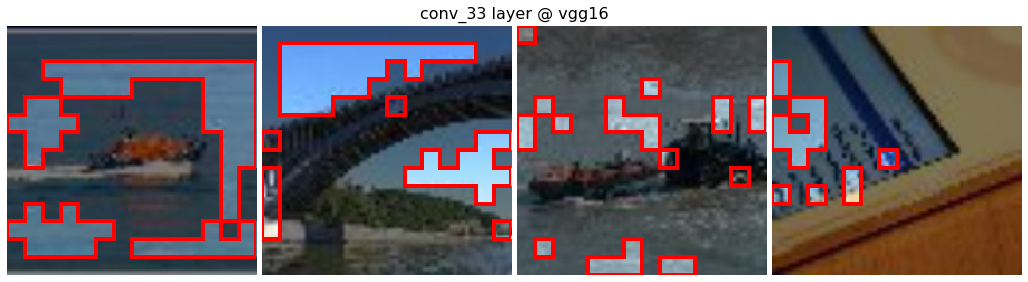

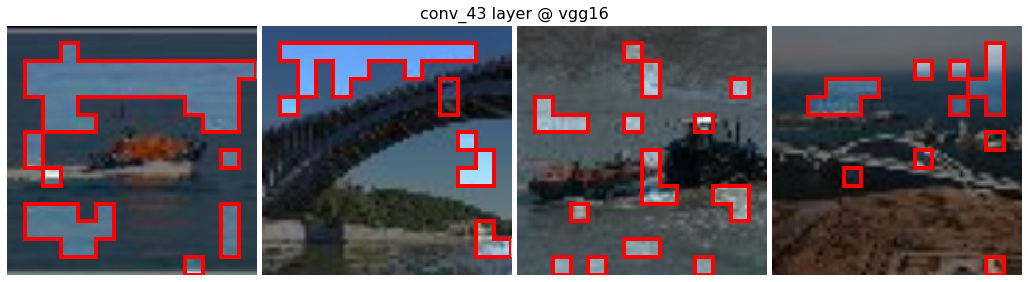

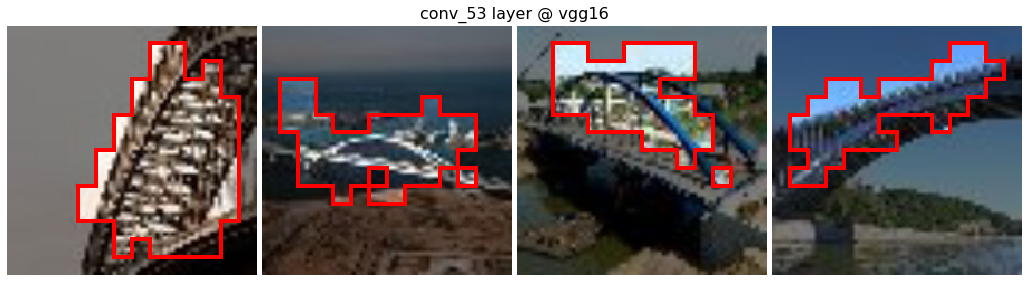

In [15]:
class_id = 0
specify_samples = [18, 26, 33, 37, 352, 424, 438]
class_names = CLASS_NAMES[dataset]
print(f"=== Knowledge points of the {class_names[class_id]} category ===")

feature_layer = "conv_33"
cases = find_concepts(dataset, arch, feature_layer, specify_samples, class_id)
visualize_concepts(cases, 16, f"{feature_layer} layer @ {arch}")

feature_layer = "conv_43"
cases = find_concepts(dataset, arch, feature_layer, specify_samples, class_id)
visualize_concepts(cases, 16, f"{feature_layer} layer @ {arch}")

feature_layer = "conv_53"
cases = find_concepts(dataset, arch, feature_layer, specify_samples, class_id)
visualize_concepts(cases, 16, f"{feature_layer} layer @ {arch}")

=== Knowledge points of the orange category ===


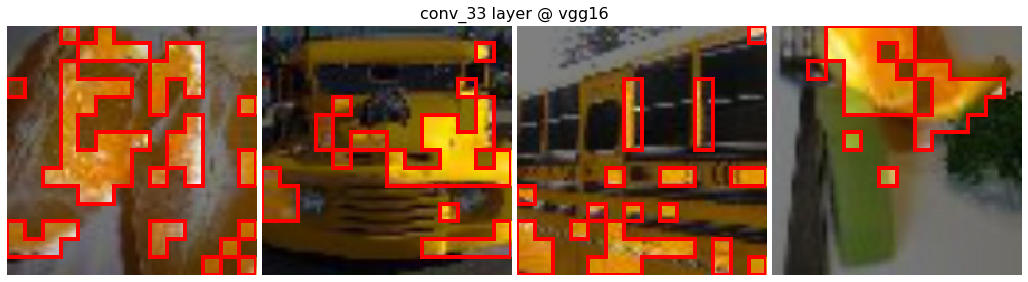

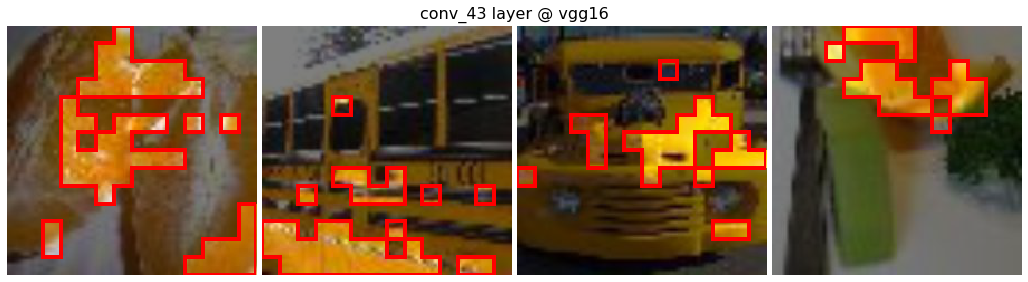

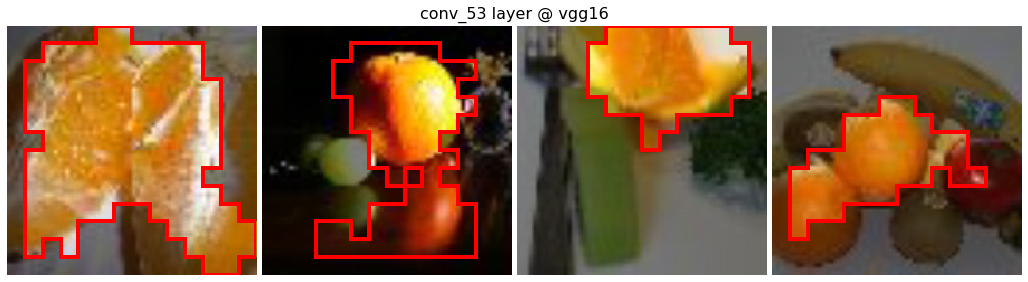

In [16]:
class_id = 9
specify_samples = [55, 80, 88, 93, 450, 488, 478, 496]
class_names = CLASS_NAMES[dataset]
print(f"=== Knowledge points of the {class_names[class_id]} category ===")

feature_layer = "conv_33"
cases = find_concepts(dataset, arch, feature_layer, specify_samples, class_id)
visualize_concepts(cases, 16, f"{feature_layer} layer @ {arch}")

feature_layer = "conv_43"
cases = find_concepts(dataset, arch, feature_layer, specify_samples, class_id)
visualize_concepts(cases, 16, f"{feature_layer} layer @ {arch}")

feature_layer = "conv_53"
cases = find_concepts(dataset, arch, feature_layer, specify_samples, class_id)
visualize_concepts(cases, 16, f"{feature_layer} layer @ {arch}")